# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 580


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "&APPID="+ weather_api_key + "&units="+ units + "&q="+ city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()   #Added parenthesis 26052024 2:03pm

       # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | luderitz
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | tolanaro
Processing Record 8 of Set 1 | sosnovo-ozerskoye
Processing Record 9 of Set 1 | angaur state
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | klyuchi
Processing Record 14 of Set 1 | opuwo
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | coyhaique
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | corinto
Processing Record 21 of Set 1 | stanley
Processing Record 22 of Set 1 | isafjordur
Processing Record 

In [5]:
city_data

[{'City': 'waitangi',
  'Lat': -43.9535,
  'Lng': -176.5597,
  'Max Temp': 8.23,
  'Humidity': 91,
  'Cloudiness': 70,
  'Wind Speed': 4.47,
  'Country': 'NZ',
  'Date': 1720661870},
 {'City': 'puerto natales',
  'Lat': -51.7236,
  'Lng': -72.4875,
  'Max Temp': 2.17,
  'Humidity': 98,
  'Cloudiness': 99,
  'Wind Speed': 2.49,
  'Country': 'CL',
  'Date': 1720661871},
 {'City': 'ain sefra',
  'Lat': 32.75,
  'Lng': -0.5833,
  'Max Temp': 30.16,
  'Humidity': 11,
  'Cloudiness': 5,
  'Wind Speed': 2.23,
  'Country': 'DZ',
  'Date': 1720661871},
 {'City': 'san patricio',
  'Lat': 28.017,
  'Lng': -97.5169,
  'Max Temp': 29.35,
  'Humidity': 66,
  'Cloudiness': 16,
  'Wind Speed': 4.21,
  'Country': 'US',
  'Date': 1720661872},
 {'City': 'papatowai',
  'Lat': -46.5619,
  'Lng': 169.4708,
  'Max Temp': 10.86,
  'Humidity': 76,
  'Cloudiness': 5,
  'Wind Speed': 1.67,
  'Country': 'NZ',
  'Date': 1720661873},
 {'City': 'nuuk',
  'Lat': 64.1835,
  'Lng': -51.7216,
  'Max Temp': 5.34,
  'Humi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,20.38,70,9,3.67,PN,1721965971
1,waitangi,-43.9535,-176.5597,9.90,89,28,1.34,NZ,1721965972
2,luderitz,-26.6481,15.1594,11.50,83,41,2.80,NA,1721965973
3,punta arenas,-53.1500,-70.9167,2.06,87,75,8.75,CL,1721965974
4,grytviken,-54.2811,-36.5092,-3.11,82,100,5.06,GS,1721965975


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.38,70,9,3.67,PN,1721965971
1,waitangi,-43.9535,-176.5597,9.90,89,28,1.34,NZ,1721965972
2,luderitz,-26.6481,15.1594,11.50,83,41,2.80,NaN,1721965973
3,punta arenas,-53.1500,-70.9167,2.06,87,75,8.75,CL,1721965974
4,grytviken,-54.2811,-36.5092,-3.11,82,100,5.06,GS,1721965975


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

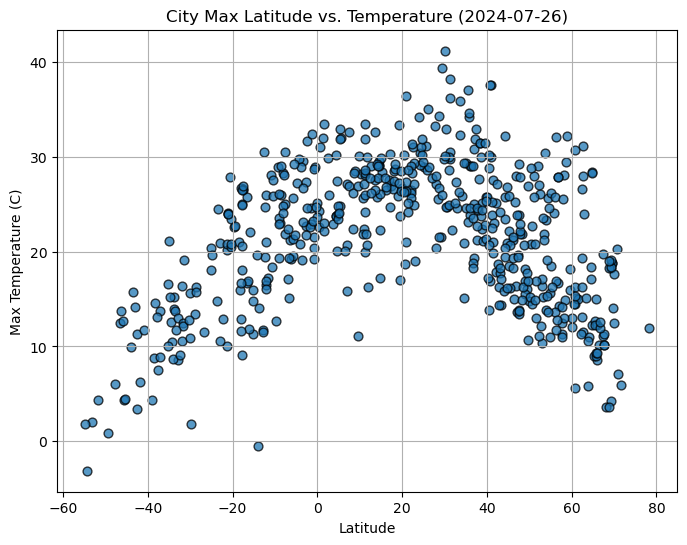

In [8]:
# Build scatter plot for latitude vs. temperature
# Reference: https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
city_data_df.plot(kind="scatter", x="Lat", y = "Max Temp", grid = True, marker = "o", s=40, alpha= 0.75,
                  facecolors = 'dark blue', edgecolors = 'black', figsize=(8,6))

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-07-26)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

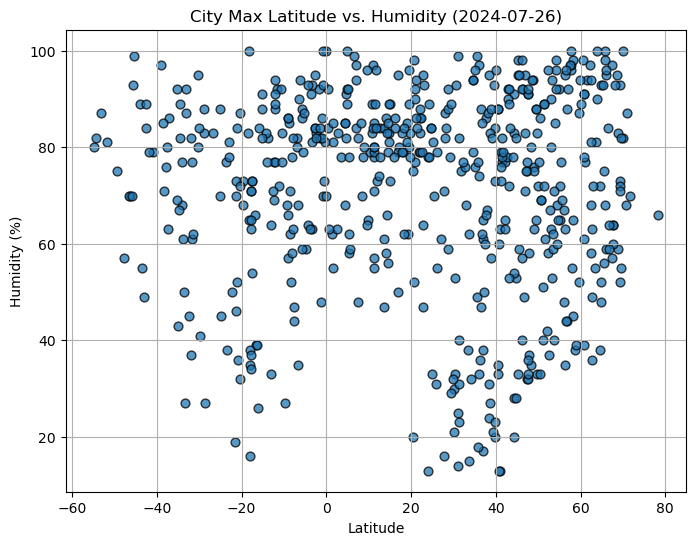

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y = "Humidity", grid = True, marker = "o", s=40, alpha= 0.75,
                  facecolors = 'dark blue', edgecolors = 'black', figsize=(8,6))

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2024-07-26)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

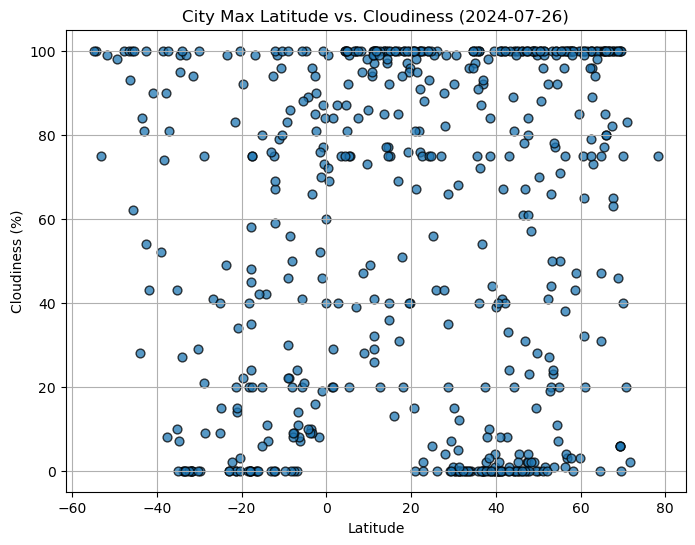

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y = "Cloudiness", grid = True, marker = "o", s=40, alpha= 0.75,
                  facecolors = 'dark blue', edgecolors = 'black', figsize=(8,6))

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2024-07-26)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

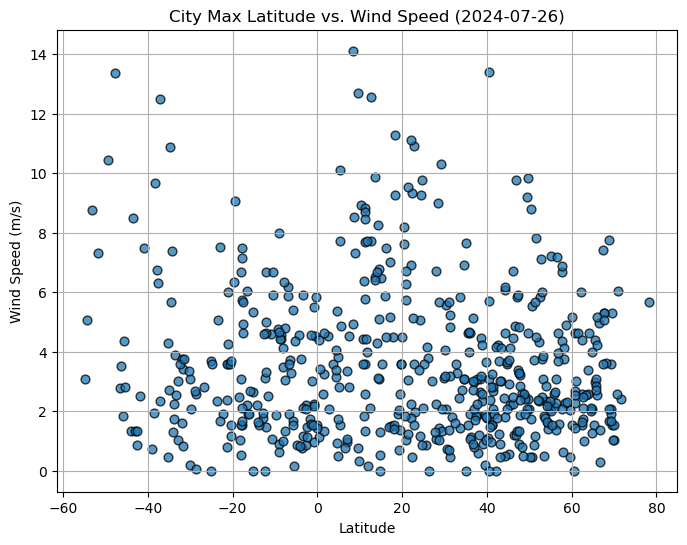

In [13]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y = "Wind Speed", grid = True, marker = "o", s=40, alpha= 0.75,
                  facecolors = 'dark blue', edgecolors = 'black', figsize=(8,6))

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2024-07-26)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [38]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      16.127738
1       8.634603
2      15.500080
3       4.986126
4       4.537391
         ...    
548    25.081851
550    20.074949
551    24.395557
553    22.471244
559    19.083058
Name: Lat, Length: 165, dtype: float64


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,sosnovo-ozerskoye,52.5249,111.5418,26.08,37,27,5.84,RU,1721965978
8,angaur state,6.9060,134.1300,27.08,84,100,3.35,PW,1721965979
9,ilulissat,69.2167,-51.1000,4.24,93,100,3.58,GL,1721965940
10,bilibino,68.0546,166.4372,3.62,93,100,3.61,RU,1721965981
11,bethel,41.3712,-73.4140,19.83,77,41,2.68,US,1721965982


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,20.38,70,9,3.67,PN,1721965971
1,waitangi,-43.9535,-176.5597,9.90,89,28,1.34,NZ,1721965972
2,luderitz,-26.6481,15.1594,11.50,83,41,2.80,NaN,1721965973
3,punta arenas,-53.1500,-70.9167,2.06,87,75,8.75,CL,1721965974
4,grytviken,-54.2811,-36.5092,-3.11,82,100,5.06,GS,1721965975


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.3341103977476364


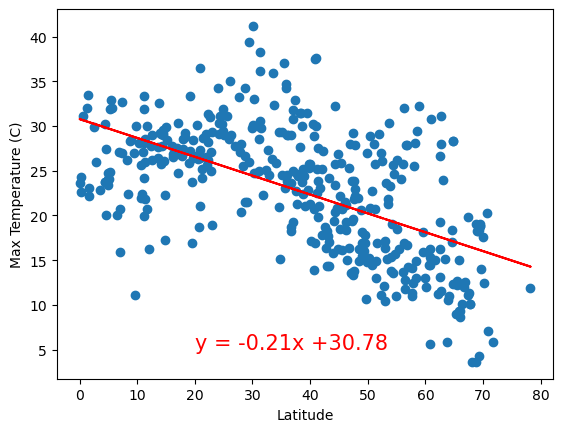

In [49]:
# Linear regression on Northern Hemisphere

# Define x_values and y_values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq, (20,5), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.559281190766819


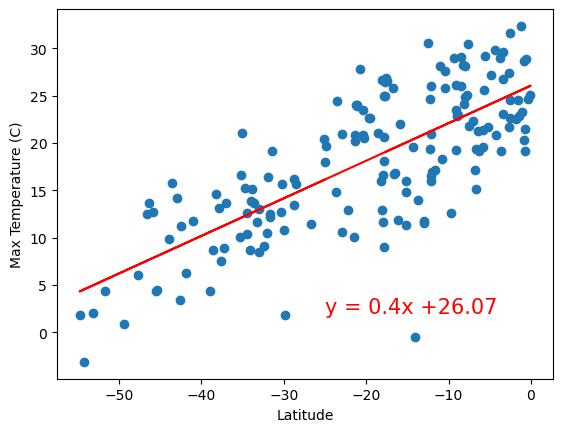

In [50]:
# Linear regression on Southern Hemisphere
# Define x_values and y_values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.annotate(line_eq, (-25,2), fontsize=15 ,color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005203314488502559


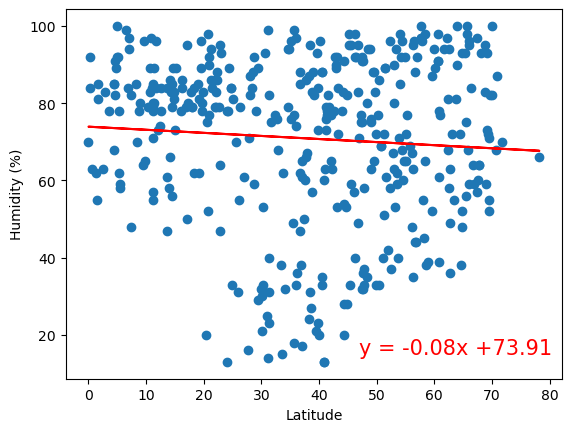

In [55]:
# Northern Hemisphere
# Define x_values and y_values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (47,15), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.0018098632374392739


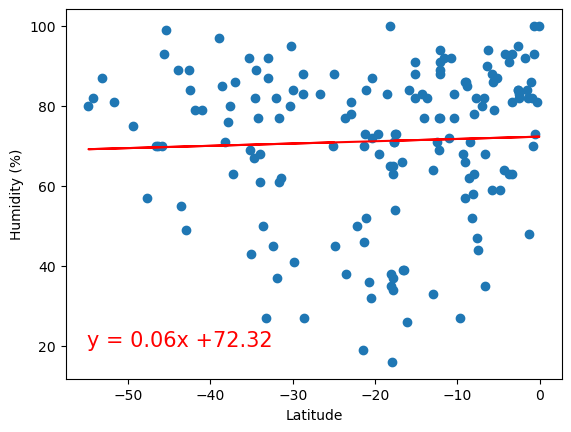

In [57]:
# Southern Hemisphere
# Define x_values and y_values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.005781534355121879


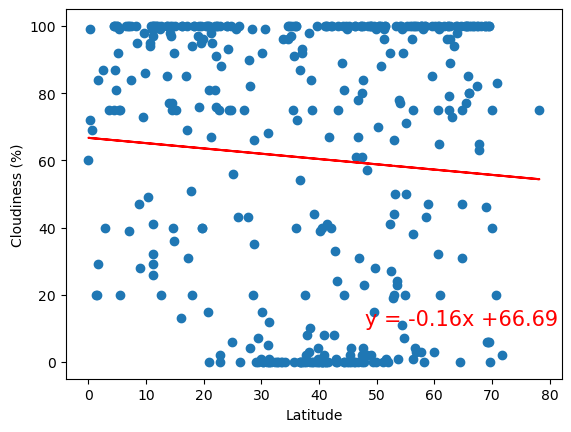

In [67]:
# Northern Hemisphere
# Define x_values and y_values
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (48,11), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.023859804895818612


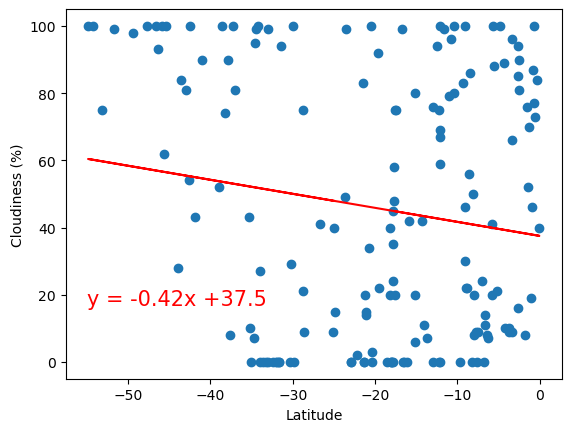

In [70]:
# Southern Hemisphere
# Define x_values and y_values
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq, (-55,17), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.037899264375647


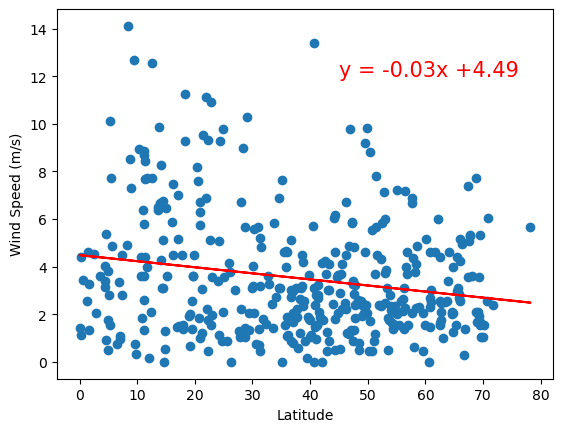

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq, (45,12), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.049764716020368575


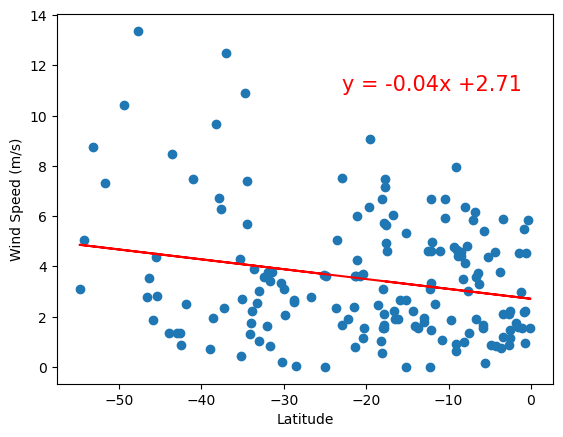

In [80]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create the plot and annotate the line equation
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.annotate(line_eq, (-23,11), fontsize=15, color="red")

# Print the r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE